# Sentimental Analysis

## Bitcoin Tweets

https://www.kaggle.com/alaix14/bitcoin-tweets-20160101-to-20190329

### Import Libraries

In [ ]:
!pip install --user --upgrade git+https://github.com/himanshudabas/twint.git@origin/twint-fixes#egg=twint

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import twint

In [2]:
import nest_asyncio

nest_asyncio.apply()

In [3]:
# Configure
c = twint.Config()
c.Search = "bitcoin"
c.Format = "Username: {username} |  Tweet: {tweet}"
c.Limit = 1
c.Store_csv = True
c.Output = "tweets.csv"
c.Lang = "en"
c.Until = '2015-10-15'
c.Since = '2021-04-19'
# Run
twint.run.Search(c)

In [13]:
with open("../tweets.csv", encoding="utf8") as f:
    print(f.readline(10))

﻿id;user;f


In [46]:
import tensorflow as tf
import pandas as pd
from textblob import TextBlob
import re
from matplotlib import pyplot as plt

In [6]:
df = pd.read_csv('../tweets.csv', sep=";", dtype={"id": "string", "user": "string", "fullname": "string", "url":"string", "timestamp":'string', "replies": float, "likes":float, "retweets":float, "text":"string"})

In [7]:
df.head()

,id,user,fullname,url,timestamp,replies,likes,retweets,text
0,1132977055300300800,KamdemAbdiel,Abdiel kamdem,<NA>,2019-05-27 11:49:14+00,0.0,0.0,0.0,È appena uscito un nuovo video! LES CRYPTOMONN...
1,1132977073402736640,bitcointe,Bitcointe,<NA>,2019-05-27 11:49:18+00,0.0,0.0,0.0,Cardano: Digitize Currencies; EOS https://t.co...
2,1132977023893139456,3eyedbran,Bran - 3 Eyed Raven,<NA>,2019-05-27 11:49:06+00,0.0,2.0,1.0,Another Test tweet that wasn't caught in the s...
3,1132977089089556481,DetroitCrypto,J. Scardina,<NA>,2019-05-27 11:49:22+00,0.0,0.0,0.0,Current Crypto Prices! BTC: $8721.99 USD ETH...
4,1132977092340191232,mmursaleen72,Muhammad Mursaleen,<NA>,2019-05-27 11:49:23+00,0.0,0.0,0.0,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...


In [20]:
def clean_tweet(tweet):
        '''
        Utility function to clean tweet text by removing links, special characters
        using simple regex statements.
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

In [37]:
df.describe()

,replies,likes,retweets
count,1.881052e+07,1.881052e+07,1.881052e+07
mean,2.837522e-01,2.410102e+00,9.565145e-01
std,2.196037e+01,1.390808e+02,8.153579e+01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00
max,7.738400e+04,2.919850e+05,1.812400e+05


In [38]:
df_sm = df[df.retweets>500]

In [39]:
df_sm.shape

(2721, 9)

In [43]:
for i, t in df_sm.iterrows():
    print(i)
    analysis = TextBlob(clean_tweet(df_sm.loc[i, "text"]))
    df_sm.loc[i, "sentiment"] = analysis.sentiment.polarity
    if analysis.sentiment.polarity > 0:
        df_sm.loc[i, "sentiment_text"] = 'positive'
    elif analysis.sentiment.polarity == 0:
        df_sm.loc[i, "sentiment_text"] = 'neutral'
    else:
        df_sm.loc[i, "sentiment_text"] = 'negative'

21
195
219
221
297
344
464
568
1092
1119
1610
1694
3012
4227
5912
6779
6838
7009
9926
14564
14590
18363
22406
25149
26821
29563
29640
32148
36081
40319
41483
41550
42203
44027
45235
45423
45711
49271
49826
50385
50971
51424
51553
51907
52719
52965
53050
53505
53842
54260
54716
60591
66362
70250
70497
77956
79472
86802
87584
90239
98904
100033
110663
113126
113137
114776
115393
119962
125059
125747
131230
136552
145079
150575
150857
152073
152191
152606
152857
153326
155390
164249
165077
172113
188762
201089
203836
212248
233229
236837
243699
244095
244120
244244
244579
244580
244789
245726
250080
252682
252683
266203
272326
307717
313899
313942
316452
322518
328479
328529
329289
329315
330369
330649

c:\users\juanl\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
c:\users\juanl\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)



330758
330984
331040
338871
347844
358984
363174
365380
370908
375999
398201
414256
418955
441470
444447
455485
468092
482954
489229
490836
496201
499417
503636
531557
535816
549938
553482
553597
554107
554646
555144
555552
555606
555683
556169
556601
557296
557351
557535
557914
560559
569526
569828
594705
634115
634876
638874
640351
641921
642166
642255
644378
644528
644748
644767
644816
645039
645094
653918
658900
662867
671062
674239
687350
689280
689767
695300
699636
701181
707043
718756
718820
719000
727053
739627
750358
751900
753087
775780
783504
783702
784278
784280
793260
793916
808929
817509
844388
844779
855733
860970
864295
864570
864590
864717
865593
865783
865889
865897
866109
866180
866771
867218
868139
868278
868384
888893
892506
892593
905374
908388
921450
933061
933332
935040
938983
952641
958877
971726
984215
988742
992960
1000258
1015007
1033356
1040796
1076367
1076419
1082027
1093690
1117943
1144785
1150364
1176203
1176714
1188039
1188045
1193859
1198974
1203424
1

9947207
9947286
9983097
9987167
9995835
9998169
10010033
10010985
10018338
10018481
10024601
10025107
10025554
10033677
10036238
10038095
10039826
10043288
10050509
10054335
10063644
10065632
10081672
10084783
10089393
10096807
10100882
10105655
10107892
10108079
10110075
10110208
10119205
10124506
10131560
10145999
10154447
10154465
10154473
10154535
10154676
10161882
10163698
10173121
10190029
10191250
10191874
10207935
10208499
10209971
10210900
10221053
10235110
10235911
10240507
10261641
10263838
10265174
10265950
10270007
10272834
10276768
10280369
10286589
10288990
10291259
10300203
10305561
10305585
10323590
10328119
10328163
10333063
10334246
10338574
10344961
10349276
10357116
10363866
10372539
10377711
10380422
10388005
10434582
10438875
10439338
10443382
10444796
10489468
10496526
10498432
10554892
10557363
10560111
10560351
10562790
10572976
10573287
10579837
10595453
10601327
10601668
10603373
10604505
10605023
10613270
10617039
10618445
10619193
10619992
10620558
1062279

16430003
16444351
16445421
16445486
16445542
16445564
16456867
16465509
16466459
16469016
16471955
16488060
16488199
16488230
16488275
16501140
16502288
16514511
16533364
16544959
16545020
16545077
16547045
16569099
16569151
16575730
16584165
16585428
16585741
16586105
16586401
16586406
16593282
16605220
16610599
16615046
16639074
16640308
16646843
16646868
16646943
16664721
16680895
16682412
16716355
16717845
16717955
16726780
16726814
16726839
16726847
16726865
16726886
16728623
16733619
16735527
16744016
16749172
16756087
16761990
16784367
16798905
16804345
16804348
16804383
16804698
16808272
16808456
16808703
16822854
16846153
16846295
16846314
16851338
16863426
16865106
16894885
16894974
16895272
16895550
16927651
16927989
16928252
16928276
16928277
16928295
16928299
16928300
16928785
16928827
16929198
16929476
16929509
16929791
16929958
16954262
16954414
16954583
16954587
16954612
16954635
16959052
16981479
16983212
17015282
17015379
17015502
17015524
17033877
17037012
17058024
1

In [44]:
df_sm.head()

,id,user,fullname,url,timestamp,replies,likes,retweets,text,sentiment,sentiment_text
21,1110302988,halfin,halfin,<NA>,2009-01-11 03:33:52+00,790.0,14470.0,5542.0,Running bitcoin,0.000000,neutral
195,1124328505544601601,CreditTerra,Terra Credit,<NA>,2019-05-03 15:02:59+00,213.0,1870.0,1744.0,CREDIT trading leaderboard is available in rea...,0.400000,positive
219,1127104374117949441,justinsuntron,Justin Sun,<NA>,2019-05-11 06:53:18+00,352.0,2653.0,727.0,Never too late to buy. The best timing to buy ...,0.233333,positive
221,1128788769489006599,btm_community,Bitcoin Mart,<NA>,2019-05-15 22:26:29+00,2104.0,4425.0,5070.0,Free 100 BTM worth of $24 #Airdrop from @btm_c...,0.297273,positive
297,1127974397275451392,Rhythmtrader,Rhythm,<NA>,2019-05-13 16:30:27+00,115.0,5549.0,1954.0,"The last time Bitcoin broke $8,000: Microsoft...",0.100000,positive


In [42]:
df_sm.describe()

,replies,likes,retweets,sentiment
count,2721.000000,2721.000000,2721.000000,2721.000000
mean,398.012863,3326.367512,1745.909960,0.127035
std,1737.633591,10839.810112,6517.629602,0.232614
min,0.000000,0.000000,501.000000,-1.000000
25%,64.000000,732.000000,614.000000,0.000000
50%,148.000000,1678.000000,830.000000,0.050000
75%,354.000000,3154.000000,1400.000000,0.250000
max,77384.000000,291985.000000,181240.000000,1.000000


(array([ 925.,    0.,    0.,    0.,    0., 1454.,    0.,    0.,    0.,
         342.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

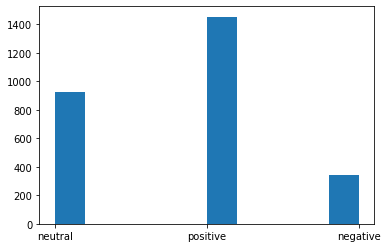

In [48]:
plt.hist(df_sm.sentiment_text)

In [49]:
df_sm.to_csv("tweets_sentiment_analysis.csv")